In [1]:
import pandas as pd
import numpy as np
import urllib
import urllib.request
import json
from sklearn.preprocessing import MinMaxScaler
import scipy as sp
import json
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


serviceurl = 'http://maps.googleapis.com/maps/api/geocode/json?'

In [3]:
df=pd.read_csv('C:\\software\\cs 506\\project\\MA-Drug-Arrest-Data\\MA-Drug-Arrest-Data\\bpd data\\ACLU_Request_BPD (1) Drug.csv')

df

,ARREST_PD_ DEPT,RACE,ARREST_DATE_TIME,ARREST_LOCATION,CHARGE,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,BPD,BLACK NON-HISPANIC,01-JAN-2012 01:20:00,Warren St,Distribution of Class B,NaN,NaN,NaN
1,BPD,WHITE NON-HISPANIC,01-JAN-2012 21:30:00,E Canton St,"Poss. W/I to Distribute, Class E",NaN,NaN,NaN
2,BPD,WHITE NON-HISPANIC,02-JAN-2012 08:50:00,Congress St / Hanover St,Possession of Class A,NaN,NaN,NaN
3,BPD,BLACK HISPANIC,02-JAN-2012 13:18:00,Boylston Street,"Distribution of Class A, Within 1000' School Zone",NaN,NaN,NaN
4,BPD,WHITE NON-HISPANIC,02-JAN-2012 13:18:00,Boylston Street,"Distribution of Class E, Within 1000' School Zone",NaN,NaN,NaN
5,BPD,BLACK NON-HISPANIC,02-JAN-2012 13:49:00,Forest Hills St,Possession of Class B,NaN,NaN,NaN
6,BPD,WHITE HISPANIC,02-JAN-2012 17:55:00,Hyde Park Ave,"Distribution of Class B, Within 1000' School Zone",NaN,NaN,NaN
7,BPD,WHITE HISPANIC,02-JAN-2012 17:55:00,Hyde Park Ave,"Distribution of Class B, Within 1000' School Zone",NaN,NaN,NaN
8,BPD,WHITE NON-HISPANIC,02-JAN-2012 19:33:00,Austin St,Possession of Class A,NaN,NaN,NaN
9,BPD,BLACK NON-HISPANIC,02-JAN-2012 19:50:00,Shawmut Ave,"Poss. W/I to Distribute, Class B, Within 1000'...",NaN,NaN,NaN


In [28]:
a = sorted(list(df['ARREST_LOCATION']))
print(a)

TypeError: '<' not supported between instances of 'float' and 'str'

In [17]:
def find_loc(address):
    #address = "Warren Street,MA"
    if len(address) < 1:
        return 0
    url = serviceurl + urllib.parse.urlencode({'sensor':'false','address':address})
    print('Retrieving:',url)
    uh = urllib.request.urlopen(url)
    data = uh.read()
    print('Retrieved:',len(data),'characters')

    #print(str(data))
    #接受过来的数据都是字节型数据需要进行decode（）操作
    try: js = json.loads(data.decode())
    except: js = None
#try:js = json.loads(str(data))
    #except: js = None
    print(js)
#     if 'status' not in js or js['status'] != 'OK':
#         print('===Failed To Retrieve===')
#         print(data)
#         continue
    print(json.dumps(js,indent=4))

    lat = js['results'][0]['geometry']['location']['lat']
    lng = js['results'][0]['geometry']['location']['lng']
    print('lat:',lat,'lng:',lng)
    location = js['results'][0]['formatted_address']
    print(location)

    return location

In [19]:
tmp = df['ARREST_LOCATION'][0]

address = tmp + ",MA"

print(address)

loc = find_loc(address)

print(loc)

Warren St,MA
Retrieving: http://maps.googleapis.com/maps/api/geocode/json?sensor=false&address=Warren+St%2CMA
Retrieved: 18295 characters
{'results': [{'address_components': [{'long_name': 'Warren Street', 'short_name': 'Warren St', 'types': ['route']}, {'long_name': 'Roxbury', 'short_name': 'Roxbury', 'types': ['neighborhood', 'political']}, {'long_name': 'Boston', 'short_name': 'Boston', 'types': ['locality', 'political']}, {'long_name': 'Suffolk County', 'short_name': 'Suffolk County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Massachusetts', 'short_name': 'MA', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}], 'formatted_address': 'Warren St, Boston, MA, USA', 'geometry': {'bounds': {'northeast': {'lat': 42.3308494, 'lng': -71.081113}, 'southwest': {'lat': 42.3094188, 'lng': -71.0842387}}, 'location': {'lat': 42.3203018, 'lng': -71.0816585}, 'location_type': 'G

In [2]:
df2 = pd.read_csv('C:\\software\\cs 506\\project\\crime_filtered.csv')
df2

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182015459,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",B2,329,NaN,2/27/18 20:51,2018,2,Tuesday,20,Part Two,COLUMBIA RD,42.306734,-71.077127,"(42.30673444, -71.07712722)"
1,I182015459,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",B2,329,NaN,2/27/18 20:51,2018,2,Tuesday,20,Part Two,COLUMBIA RD,42.306734,-71.077127,"(42.30673444, -71.07712722)"
2,I182015313,1830,Drug Violation,DRUGS - SICK ASSIST - HEROIN,B3,457,NaN,2/27/18 12:01,2018,2,Tuesday,12,Part Two,ESMOND ST,42.298620,-71.085110,"(42.29861988, -71.08511004)"
3,I182015294,1845,Drug Violation,DRUGS - POSS CLASS D,A7,25,NaN,2/27/18 11:21,2018,2,Tuesday,11,Part Two,WHITE ST,42.380532,-71.035104,"(42.38053192, -71.03510439)"
4,I182015238,1806,Drug Violation,DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS,E18,494,NaN,2/27/18 4:47,2018,2,Tuesday,4,Part Two,ARLINGTON ST,42.259780,-71.116231,"(42.25977993, -71.11623073)"
5,I182015238,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,E18,494,NaN,2/27/18 4:47,2018,2,Tuesday,4,Part Two,ARLINGTON ST,42.259780,-71.116231,"(42.25977993, -71.11623073)"
6,I182015238,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,E18,494,NaN,2/27/18 4:47,2018,2,Tuesday,4,Part Two,ARLINGTON ST,42.259780,-71.116231,"(42.25977993, -71.11623073)"
7,I182015120,1815,Drug Violation,DRUGS - POSSESSION,C11,363,NaN,2/26/18 16:50,2018,2,Monday,16,Part Two,CENTRE ST,42.294266,-71.059685,"(42.29426595, -71.05968487)"
8,I182015120,1810,Drug Violation,DRUGS - SALE / MANUFACTURING,C11,363,NaN,2/26/18 16:50,2018,2,Monday,16,Part Two,CENTRE ST,42.294266,-71.059685,"(42.29426595, -71.05968487)"
9,I182015120,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,C11,363,NaN,2/26/18 16:50,2018,2,Monday,16,Part Two,CENTRE ST,42.294266,-71.059685,"(42.29426595, -71.05968487)"


In [35]:
r = []
for line in df2.itertuples():
    if str(line.Lat) != "nan" :
        r.append(line.Lat)
        



42.393272889999999

(12460, 2)


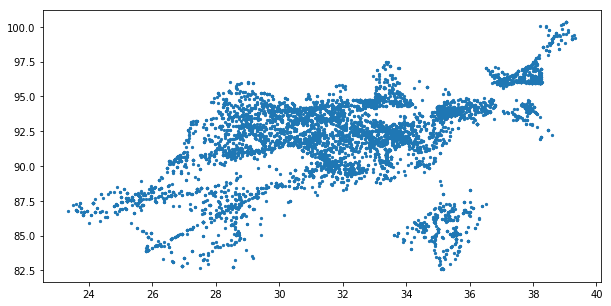

In [41]:
loc2 = []
for line in df2.itertuples():
    if str(line.Lat) != "nan" and str(line.Lat) != "-1.0":
        #print(line.Lat,line)
        loc2.append([(float(line.Lat)-42)*100,(float(line.Long)+72)*100])


        
loc2_arr = np.asarray(loc2)

print(loc2_arr.shape)

plt.figure(figsize=(10,5))
_ = plt.scatter(loc2_arr[:,0], loc2_arr[:,1], s = 5)
plt.show()

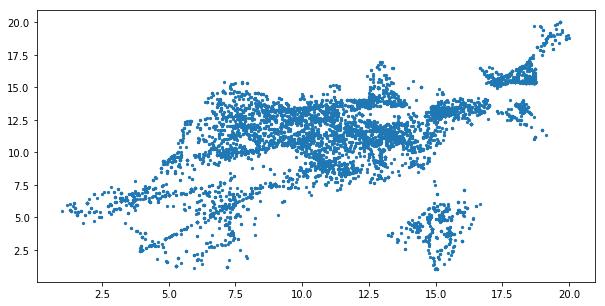

In [38]:
loc = []
#type(df2["Lat"][0])
for line in df2.itertuples():
    if str(line.Lat) != "nan" and str(line.Lat) != "-1.0":
        loc.append([line.Lat,line.Long])
        
loc = np.asarray(loc)

scaler = MinMaxScaler(copy=True, feature_range=(1,20))
scaler.fit(loc)
loc_arr = scaler.transform(loc)
#print(loc_arr)

plt.figure(figsize=(10,5))
_ = plt.scatter(loc_arr[:,0], loc_arr[:,1], s = 5)
plt.show()

In [8]:
tmp = set(list(df2['OFFENSE_DESCRIPTION']))



{'DRUGS - CLASS A TRAFFICKING OVER 18 GRAMS',
 'DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS',
 'DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS',
 'DRUGS - CONSP TO VIOL CONTROLLED SUBSTANCE',
 'DRUGS - GLUE INHALATION',
 'DRUGS - OTHER',
 'DRUGS - POSS CLASS A - HEROIN, ETC.',
 'DRUGS - POSS CLASS A - HEROIN, ETC. ',
 'DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP',
 'DRUGS - POSS CLASS B - COCAINE, ETC.',
 'DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP',
 'DRUGS - POSS CLASS C',
 'DRUGS - POSS CLASS C - INTENT TO MFR DIST DISP',
 'DRUGS - POSS CLASS D',
 'DRUGS - POSS CLASS D - INTENT MFR DIST DISP',
 'DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP',
 'DRUGS - POSS CLASS D - MARIJUANA, ETC.',
 'DRUGS - POSS CLASS E',
 'DRUGS - POSS CLASS E - INTENT TO MFR DIST DISP',
 'DRUGS - POSS CLASS E INTENT TO MF DIST DISP',
 'DRUGS - POSSESSION',
 'DRUGS - POSSESSION OF DRUG PARAPHANALIA',
 'DRUGS - SALE / MANUFACTURING',
 'DRUGS - SICK ASSIST - HEROIN',
 'DRUGS - SICK ASSIST - OTHER HARMFUL DRUG',


In [6]:
traffick = 0
poss_classA = 0
poss_classA_intent = 0
poss_classB = 0
poss_classB_intent = 0
poss_classC = 0
poss_classC_intent = 0
poss_classD = 0
poss_classD_intent = 0
poss_classE = 0
poss_classE_intent = 0
glue = 0
sick = 0
sale = 0
para = 0
consp = 0
other = 0
for line in df2.itertuples():
    tmp = line.OFFENSE_DESCRIPTION.split()
    

    
    
    
    if "TRAFFICKING" in tmp:
        traffick += 1
    elif "GLUE" in tmp:
        glue += 1
    elif "OTHER" in tmp:
        other += 1
    elif "POSS" in tmp and "A" in tmp and "DIST" in tmp:
        poss_classA_intent += 1
    elif "POSS" in tmp and "A" in tmp:
        poss_classA += 1
    elif "POSS" in tmp and "B" in tmp and "DIST" in tmp:
        poss_classB_intent += 1
    elif "POSS" in tmp and "B" in tmp:
        poss_classB += 1
    elif "POSS" in tmp and "C" in tmp and "DIST" in tmp:
        poss_classC_intent += 1
    elif "POSS" in tmp and "C" in tmp:
        poss_classC += 1
    elif "POSS" in tmp and "D" in tmp  and "DIST" in tmp:
        poss_classD_intent += 1
    elif "POSS" in tmp and "D" in tmp:
        poss_classD += 1
    elif "POSS" in tmp and "E" in tmp and "DIST" in tmp:
        poss_classE_intent += 1
    elif "POSS" in tmp and "E" in tmp:
        poss_classE += 1
    elif "SICK" in tmp:
        sick += 1
    elif "SALE" in tmp:
        sale += 1
    elif "PARAPHANALIA" in tmp:
        para += 1
    elif "CONSP" in tmp:
        consp += 1
print(traffick)
print(poss_classA)
print(poss_classB)
print(poss_classC)
print(poss_classD)
print(poss_classE)
print(sick)
print(sale)
print(para)
print(consp)

print("=")

print(poss_classA_intent)
print(poss_classB_intent)
print(poss_classC_intent)
print(poss_classD_intent)
print(poss_classE_intent)
print(other)
print(glue)

280
1273
2150
396
819
517
1001
1788
70
83
=
1103
1700
175
707
136
1705
1


In [2]:
import folium
map_osm = folium.Map(location=[42.30673444, -71.07712722])

In [3]:
map_osm